<a href="https://colab.research.google.com/github/TGJAISAI/EDA/blob/main/Loan_Data_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")


In [3]:
df= pd.read_csv("/content/Loan payments data.csv")
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [4]:
df.tail()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female
499,xqd20160500,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/19/2016 11:58,8.0,28,High School or Below,male


In [7]:
numerical= df.select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print('---------------------')
print(f'Numerical Columns:  {df[numerical].columns}')
print('---------------------')
print(f'Categorical Columns: {df[categorical].columns}')
print('---------------------')

---------------------
Numerical Columns:  Index(['Principal', 'terms', 'past_due_days', 'age'], dtype='object')
---------------------
Categorical Columns: Index(['Loan_ID', 'loan_status', 'effective_date', 'due_date', 'paid_off_time',
       'education', 'Gender'],
      dtype='object')
---------------------


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [64]:
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [65]:
df['past_due_days'] = df['past_due_days'].fillna(0)
df['paid_off_time'] = df['paid_off_time'].fillna(1)

In [66]:
df.isnull().sum()

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

In [67]:
df.shape

(500, 11)

In [68]:
df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,500.000000,500.000000
mean,943.200000,22.824000,14.404000,31.116000
std,115.240274,8.000064,25.614312,6.084784
min,300.000000,7.000000,0.000000,18.000000
25%,1000.000000,15.000000,0.000000,27.000000
50%,1000.000000,30.000000,0.000000,30.000000
75%,1000.000000,30.000000,12.000000,35.000000
max,1000.000000,30.000000,76.000000,51.000000


In [69]:
a = df['loan_status'].value_counts()
pd.DataFrame(a)

,loan_status
PAIDOFF,300
COLLECTION,100
COLLECTION_PAIDOFF,100


Text(0, 0.5, 'Count')

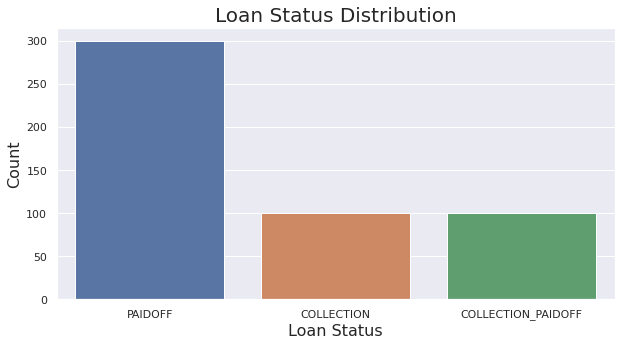

In [70]:
plt.figure(figsize=[10,5])
sns.countplot(x="loan_status",data=df)
plt.title("Loan Status Distribution",fontsize=20)
plt.xlabel('Loan Status', fontsize=16)
plt.ylabel('Count', fontsize=16)

In [72]:
import plotly.express as px
df1= df.groupby(by=["loan_status", "Principal"]).size().reset_index(name="counts")

px.bar(data_frame=df1, x="loan_status", y="counts", color="Principal", barmode="group")

In [73]:
b = df["Principal"].value_counts()
pd.DataFrame(b)
#df_analyst['job_title'].value_counts()[:20]

,Principal
1000,377
800,111
300,6
500,3
900,2
700,1


**what is the most size of the principal ?**

Text(0, 0.5, 'Count')

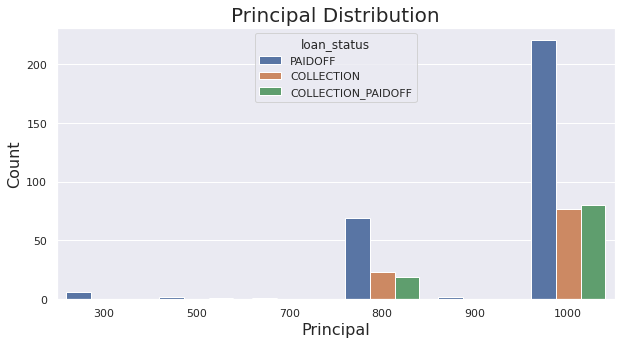

In [74]:
plt.figure(figsize=[10,5])
sns.countplot(x="Principal",data=df,hue="loan_status")
plt.title("Principal Distribution",fontsize=20)
plt.xlabel('Principal', fontsize=16)
plt.ylabel('Count', fontsize=16)

In [76]:
c = df["terms"].value_counts()
pd.DataFrame(c)

,terms
30,272
15,207
7,21


In [ ]:
c = df["effective_date"].value_counts()
pd.DataFrame(c)

**when is the most effective date ?**

Text(0, 0.5, 'Count')

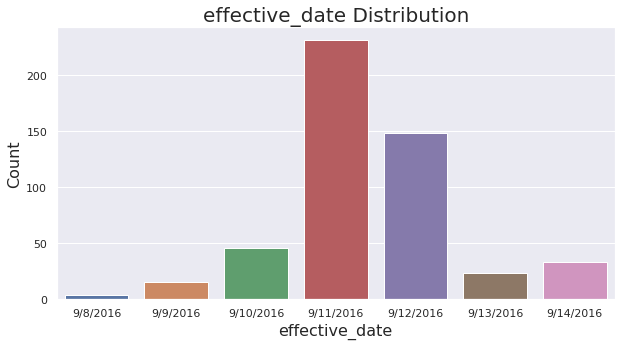

In [108]:
plt.figure(figsize=[10,5])
sns.countplot(x="effective_date",data=df)
plt.title("effective_date Distribution",fontsize=20)
plt.xlabel('effective_date', fontsize=16)
plt.ylabel('Count', fontsize=16)

In [ ]:
d = df['age'].value_counts()
pd.DataFrame(d)

**which age group has the more loan ? ☄**

Text(0, 0.5, 'Count')

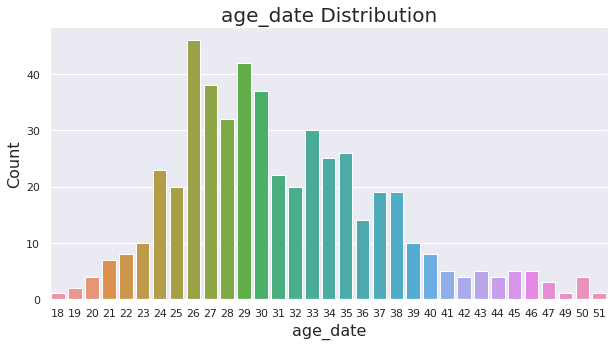

In [8]:
plt.figure(figsize=[10,5])
sns.countplot(x="age",data=df)
plt.title("age_date Distribution",fontsize=20)
plt.xlabel('age_date', fontsize=16)
plt.ylabel('Count', fontsize=16)


In [123]:
e = df['Gender'].value_counts()
pd.DataFrame(e)

,Gender
male,423
female,77


**which gender has more loan ? ✅**

Text(0, 0.5, 'Count')

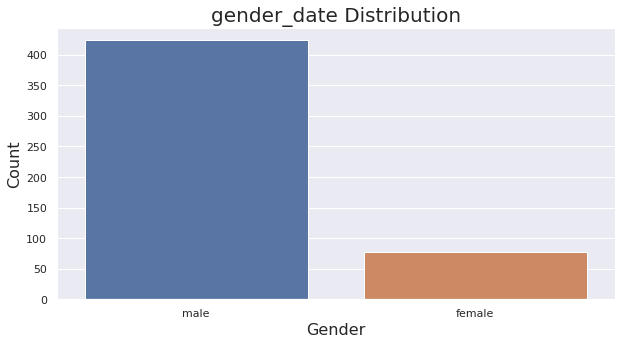

In [126]:
plt.figure(figsize=[10,5])
sns.countplot(x='Gender',data=df)
plt.title("gender_date Distribution",fontsize=20)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)

In [11]:
df.corr()

,Principal,terms,past_due_days,age
Principal,1.000000,0.534302,-0.093139,-0.092613
terms,0.534302,1.000000,-0.102613,-0.074259
past_due_days,-0.093139,-0.102613,1.000000,-0.053849
age,-0.092613,-0.074259,-0.053849,1.000000


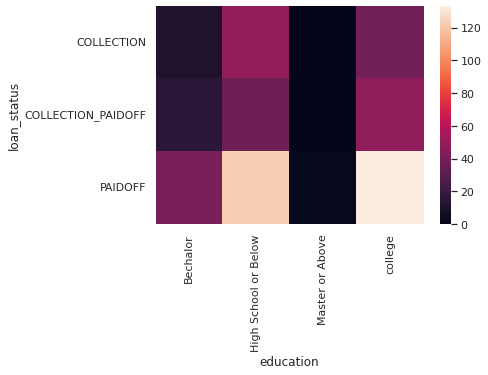

In [15]:
sns.heatmap(pd.crosstab(df['loan_status'], df['education']))
plt.show()